In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from time import time
from IPython.display import display # Allows the use of display() for DataFrames
from ggplot import *
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import f1_score
from sklearn import preprocessing
from sklearn.metrics import classification_report
from sklearn import metrics


# Display for notebooks
%matplotlib inline

# Load the training data datasets
data1 = pd.read_csv("1year.csv")
data1['category'] = np.where(data1['class']==0, 0, 2)

data2 = pd.read_csv("csv_result-2year.csv")
data2['category'] = np.where(data2['class']==0, 0, 2)
del data2['id']

data3 = pd.read_csv("csv_result-3year.csv")
data3['category'] = np.where(data3['class']==0, 0, 2)
del data3['id']

data4 = pd.read_csv("csv_result-4year.csv")
data4['category'] = np.where(data4['class']==0, 0, 1)
del data4['id']

data5 = pd.read_csv("csv_result-5year.csv")
data5['category'] = np.where(data5['class']==0, 0, 1)
del data5['id']

# Success - Display the first record, just for a sense check
display(data1.head(n=1))
display(data2.head(n=1))
display(data3.head(n=1))
display(data4.head(n=1))
display(data5.head(n=1))

# Concatenate the 5 datasets into a single one
dataset = pd.concat([data1,data2,data3,data4,data5])


dataset.replace({'?': 0}, inplace=True)
dataset = dataset.replace(0, np.NaN)

# CEnsure there are no NULLs in the target column and delete the original class column
dataset['category'] = dataset['category'].replace(np.NaN,0)
del dataset['class']

# Add columns names
dataset.columns = [

'Col1_net_profit_div_total_assets',
'Col2_total_liabilities_div_total_assets',
'Col3_working_capital_div_total_assets',
'Col4_current_assets_div_short-term_liabilities',
'Col5_[(cash_plus_short-term_securities_plus_receivables_-_short-term_liabilities)_div_(operating_expenses_-_depreciation)]_*_365',
'Col6_retained_earnings_div_total_assets',
'Col7_EBIT_div_total_assets',
'Col8_book_value_of_equity_div_total_liabilities',
'Col9_sales_div_total_assets',
'Col10_equity_div_total_assets',
'Col11_(gross_profit_plus_extraordinary_items_plus_financial_expenses)_div_total_assets',
'Col12_gross_profit_div_short-term_liabilities',
'Col13_(gross_profit_plus_depreciation)_div_sales',
'Col14_(gross_profit_plus_interest)_div_total_assets',
'Col15_(total_liabilities_*_365)_div_(gross_profit_plus_depreciation)',
'Col16_(gross_profit_plus_depreciation)_div_total_liabilities',
'Col17_total_assets_div_total_liabilities',
'Col18_gross_profit_div_total_assets',
'Col19_gross_profit_div_sales',
'Col20_(inventory_*_365)_div_sales',
'Col21_sales_(n)_div_sales_(n-1)',
'Col22_profit_on_operating_activities_div_total_assets',
'Col23_net_profit_div_sales',
'Col24_gross_profit_(in_3_years)_div_total_assets',
'Col25_(equity_-_share_capital)_div_total_assets',
'Col26_(net_profit_plus_depreciation)_div_total_liabilities',
'Col27_profit_on_operating_activities_div_financial_expenses',
'Col28_working_capital_div_fixed_assets',
'Col29_logarithm_of_total_assets',
'Col30_(total_liabilities_-_cash)_div_sales',
'Col31_(gross_profit_plus_interest)_div_sales',
'Col32_(current_liabilities_*_365)_div_cost_of_products_sold',
'Col33_operating_expenses_div_short-term_liabilities',
'Col34_operating_expenses_div_total_liabilities',
'Col35_profit_on_sales_div_total_assets',
'Col36_total_sales_div_total_assets',
'Col37_(current_assets_-_inventories)_div_long-term_liabilities',
'Col38_constant_capital_div_total_assets',
'Col39_profit_on_sales_div_sales',
'Col40_(current_assets_-_inventory_-_receivables)_div_short-term_liabilities',
'Col41_total_liabilities_div_((profit_on_operating_activities_plus_depreciation)_*_(12div365))',
'Col42_profit_on_operating_activities_div_sales',
'Col43_rotation_receivables_plus_inventory_turnover_in_days',
'Col44_(receivables_*_365)_div_sales',
'Col45_net_profit_div_inventory',
'Col46_(current_assets_-_inventory)_div_short-term_liabilities',
'Col47_(inventory_*_365)_div_cost_of_products_sold',
'Col48_EBITDA_(profit_on_operating_activities_-_depreciation)_div_total_assets',
'Col49_EBITDA_(profit_on_operating_activities_-_depreciation)_div_sales',
'Col50_current_assets_div_total_liabilities',
'Col51_short-term_liabilities_div_total_assets',
'Col52_(short-term_liabilities_*_365)_div_cost_of_products_sold)',
'Col53_equity_div_fixed_assets',
'Col54_constant_capital_div_fixed_assets',
'Col55_working_capital',
'Col56_(sales_-_cost_of_products_sold)_div_sales',
'Col57_(current_assets_-_inventory_-_short-term_liabilities)_div_(sales_-_gross_profit_-_depreciation)',
'Col58_total_costs_divtotal_sales',
'Col59_long-term_liabilities_div_equity',
'Col60_sales_div_inventory',
'Col61_sales_div_receivables',
'Col62_(short-term_liabilities_*365)_div_sales',
'Col63_sales_div_short-term_liabilities',
'Col64_sales_div_fixed_assets',
    'category'
]


# Profile the number of NULLs in each feature
print(dataset.isnull().sum())



/Users/stuartmcmeechan/anaconda2/lib/python2.7/site-packages/ggplot/utils.py:66: FutureWarning: pandas.tslib is deprecated and will be removed in a future version.
You can access Timestamp as pandas.Timestamp
  pd.tslib.Timestamp,
/Users/stuartmcmeechan/anaconda2/lib/python2.7/site-packages/ggplot/stats/smoothers.py:4: FutureWarning: The pandas.lib module is deprecated and will be removed in a future version. These are private functions and can be accessed from pandas._libs.lib instead
  from pandas.lib import Timestamp
/Users/stuartmcmeechan/anaconda2/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools
/Users/stuartmcmeechan/anaconda2/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (1,2,3,6,7,9,10,11,14,18,22,24,25,29,35,36,38,48,51,55,57,59) have mixed 

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,class,category
0,0.20055,0.37951,0.39641,2.0472,32.351,0.38825,0.24976,1.3305,1.1389,0.50494,...,0.39718,0.87804,0.001924,8.416,5.1372,82.658,4.4158,7.4277,0,0


,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,class,category
0,0.20235,0.465,0.24038,1.5171,-14.547,0.51069,0.25366,0.91816,1.1519,0.42695,...,0.47395,0.86816,0.00023951,8.5487,5.1655,107.74,3.3879,5.344,0,0


,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,class,category
0,0.17419,0.41299,0.14371,1.348,-28.982,0.60383,0.21946,1.1225,1.1961,0.46359,...,0.37574,0.83604,0.000007,9.7145,6.2813,84.291,4.3303,4.0341,0,0


,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,class,category
0,0.15929,0.4624,0.07773,1.1683,-44.853,0.46702,0.18948,0.82895,1.1223,0.3833,...,0.41557,0.89101,0.001422,7.7928,4.9914,119.81,3.0465,3.056,0,0


,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,class,category
0,0.088238,0.55472,0.01134,1.0205,-66.52,0.34204,0.10949,0.57752,1.0881,0.32036,...,0.27543,0.91905,0.002024,7.2711,4.7343,142.76,2.5568,3.2597,0,0


Col1_net_profit_div_total_assets                                                                                                       84
Col2_total_liabilities_div_total_assets                                                                                                25
Col3_working_capital_div_total_assets                                                                                                  10
Col4_current_assets_div_short-term_liabilities                                                                                        134
Col5_[(cash_plus_short-term_securities_plus_receivables_-_short-term_liabilities)_div_(operating_expenses_-_depreciation)]_*_365       89
Col6_retained_earnings_div_total_assets                                                                                              6067
Col7_EBIT_div_total_assets                                                                                                             20
Col8_book_value_of_equity_div_tota

In [2]:
# Sense check number of rows and columns
dataset.shape

(43405, 65)

In [3]:
# Creation of new columns
dataset['NaNCount'] = len(dataset.columns) - dataset.count(axis=1)
dataset['isblank-profit_on_operating_activities_div_financial_expenses'] = np.where((dataset['Col27_profit_on_operating_activities_div_financial_expenses'] > 0), 1, 0)
dataset['isblank-Col21_sales_(n)_div_sales_(n-1)'] = np.where((dataset['Col21_sales_(n)_div_sales_(n-1)'] > 0), 1, 0)
dataset['isblank-Col6_retained_earnings_div_total_assets'] = np.where((dataset['Col6_retained_earnings_div_total_assets'] > 0), 1, 0)
#dataset['isblank-Col59_long-term_liabilities_div_equity'] = np.where((dataset['Col59_long-term_liabilities_div_equity'] > 0), 1, 0)

In [4]:
display(dataset.head(n=10))

,Col1_net_profit_div_total_assets,Col2_total_liabilities_div_total_assets,Col3_working_capital_div_total_assets,Col4_current_assets_div_short-term_liabilities,Col5_[(cash_plus_short-term_securities_plus_receivables_-_short-term_liabilities)_div_(operating_expenses_-_depreciation)]_*_365,Col6_retained_earnings_div_total_assets,Col7_EBIT_div_total_assets,Col8_book_value_of_equity_div_total_liabilities,Col9_sales_div_total_assets,Col10_equity_div_total_assets,...,Col60_sales_div_inventory,Col61_sales_div_receivables,Col62_(short-term_liabilities_*365)_div_sales,Col63_sales_div_short-term_liabilities,Col64_sales_div_fixed_assets,category,NaNCount,isblank-profit_on_operating_activities_div_financial_expenses,isblank-Col21_sales_(n)_div_sales_(n-1),isblank-Col6_retained_earnings_div_total_assets
0,0.20055,0.37951,0.39641,2.0472,32.351,0.38825,0.24976,1.3305,1.1389,0.50494,...,8.416,5.1372,82.658,4.4158,7.4277,0.0,0,1,1,1
1,0.20912,0.49988,0.47225,1.9447,14.786,0,0.25834,0.99601,1.6996,0.49788,...,4.1486,3.2732,107.35,3.4,60.987,0.0,2,1,1,1
2,0.24866,0.69592,0.26713,1.5548,-1.1523,0,0.30906,0.43695,1.309,0.30408,...,4.9909,3.951,134.27,2.7185,5.2078,0.0,1,1,1,1
3,0.081483,0.30734,0.45879,2.4928,51.952,0.14988,0.092704,1.8661,1.0571,0.57353,...,4.5746,3.6147,86.435,4.2228,5.5497,0.0,1,1,1,1
4,0.18732,0.61323,0.2296,1.4063,-7.3128,0.18732,0.18732,0.6307,1.1559,0.38677,...,6.3985,4.3158,127.21,2.8692,7.898,0.0,1,1,0,1
5,0.22822,0.49794,0.35969,1.7502,-47.717,0,0.28139,1.0083,1.9786,0.50206,...,3.4028,8.9949,88.444,4.1269,12.299,0.0,1,1,1,1
6,0.11109,0.64744,0.28971,1.4705,2.5349,0,0.11109,0.54454,1.7348,0.35256,...,6.3222,2.9098,129.55,2.8173,18.352,0.0,3,1,1,1
7,0.53232,0.027059,0.70554,53.954,299.58,0,0.6524,35.957,0.65273,0.97294,...,9.13,82.05,7.4503,48.991,2.3217,0.0,2,1,0,1
8,0.00902,0.63202,0.053735,1.1263,-37.842,0,0.014434,0.58223,1.3332,0.36798,...,9.9665,4.2382,116.5,3.133,2.5603,0.0,0,1,1,1
9,0.12408,0.83837,0.14204,1.1694,-91.883,0,0.15328,0.19279,2.1156,0.16163,...,3.3192,6.4994,144.63,2.5236,107.67,0.0,2,1,1,1


In [5]:
# Check what % of rows are blank, by class, for key columns
dataset[['Col6_retained_earnings_div_total_assets', 'category','Col21_sales_(n)_div_sales_(n-1)'
,'Col22_profit_on_operating_activities_div_total_assets'
,'Col27_profit_on_operating_activities_div_financial_expenses'
,'Col37_(current_assets_-_inventories)_div_long-term_liabilities'
,'Col45_net_profit_div_inventory'
,'Col59_long-term_liabilities_div_equity'
,'Col60_sales_div_inventory']].groupby("category").apply(lambda x: x.isnull().mean())

,Col6_retained_earnings_div_total_assets,category,Col21_sales_(n)_div_sales_(n-1),Col22_profit_on_operating_activities_div_total_assets,Col27_profit_on_operating_activities_div_financial_expenses,Col37_(current_assets_-_inventories)_div_long-term_liabilities,Col45_net_profit_div_inventory,Col59_long-term_liabilities_div_equity,Col60_sales_div_inventory
category,,,,,,,,,
0.0,0.134918,0.0,0.126809,0.030353,0.049596,0.435857,0.047708,0.215327,0.047829
1.0,0.200000,0.0,0.229189,0.001081,0.299459,0.507027,0.098378,0.002162,0.098378
2.0,0.264151,0.0,0.345626,0.000000,0.375643,0.435678,0.072899,0.345626,0.072899


In [6]:
# Check average number of missing columns per class
missingprofiling = dataset.groupby('category')['NaNCount'].mean()
print missingprofiling

category
0.0    1.369681
1.0    1.843243
2.0    2.238422
Name: NaNCount, dtype: float64


In [7]:
#print (max(dataset['isblank-profit_on_operating_activities_div_financial_expenses']))

#print dataset[['isblank-profit_on_operating_activities_div_financial_expenses', 'category']].groupby("category").apply(lambda x: x.isnull().mean())

In [9]:
ds = dataset
print(ds.isnull().sum())


Col1_net_profit_div_total_assets                                                                                                      84
Col2_total_liabilities_div_total_assets                                                                                               25
Col3_working_capital_div_total_assets                                                                                                 10
Col4_current_assets_div_short-term_liabilities                                                                                       134
Col5_[(cash_plus_short-term_securities_plus_receivables_-_short-term_liabilities)_div_(operating_expenses_-_depreciation)]_*_365      89
Col6_retained_earnings_div_total_assets                                                                                             6067
Col7_EBIT_div_total_assets                                                                                                            20
Col8_book_value_of_equity_div_total_liabi

In [11]:
# Test 1 - remove columns with high number of NaNs
#del ds['Col6_retained_earnings_div_total_assets']
#del ds['Col21_sales_(n)_div_sales_(n-1)']
#del ds['Col22_profit_on_operating_activities_div_total_assets']
#del ds['Col27_profit_on_operating_activities_div_financial_expenses']
#del ds['Col37_(current_assets_-_inventories)_div_long-term_liabilities']
#del ds['Col45_net_profit_div_inventory']
#del ds['Col59_long-term_liabilities_div_equity']
#del ds['Col60_sales_div_inventory']

# Test 2 - remove columns with little impact
#del ds['Col3_working_capital_div_total_assets']
#del ds['Col4_current_assets_div_short-term_liabilities']
#del ds['Col5_[(cash_plus_short-term_securities_plus_receivables_-_short-term_liabilities)_div_(operating_expenses_-_depreciation)]_*_365']
#del ds['Col6_retained_earnings_div_total_assets']
#del ds['Col9_sales_div_total_assets']
#del ds['Col11_(gross_profit_plus_extraordinary_items_plus_financial_expenses)_div_total_assets']
#del ds['Col12_gross_profit_div_short-term_liabilities']
#del ds['Col13_(gross_profit_plus_depreciation)_div_sales']
#del ds['Col14_(gross_profit_plus_interest)_div_total_assets']
#del ds['Col17_total_assets_div_total_liabilities']
#del ds['Col19_gross_profit_div_sales']
#del ds['Col20_(inventory_*_365)_div_sales']
#del ds['Col23_net_profit_div_sales']
#del ds['Col25_(equity_-_share_capital)_div_total_assets']
#del ds['Col26_(net_profit_plus_depreciation)_div_total_liabilities']
#del ds['Col27_profit_on_operating_activities_div_financial_expenses']
#del ds['Col28_working_capital_div_fixed_assets']
#del ds['Col29_logarithm_of_total_assets']
#del ds['Col30_(total_liabilities_-_cash)_div_sales']
#del ds['Col31_(gross_profit_plus_interest)_div_sales']
#del ds['Col32_(current_liabilities_*_365)_div_cost_of_products_sold']
#del ds['Col33_operating_expenses_div_short-term_liabilities']
#del ds['Col34_operating_expenses_div_total_liabilities']
#del ds['Col36_total_sales_div_total_assets']
#del ds['Col37_(current_assets_-_inventories)_div_long-term_liabilities']
#del ds['Col40_(current_assets_-_inventory_-_receivables)_div_short-term_liabilities']
#del ds['Col41_total_liabilities_div_((profit_on_operating_activities_plus_depreciation)_*_(12div365))']
#del ds['Col43_rotation_receivables_plus_inventory_turnover_in_days']
#del ds['Col44_(receivables_*_365)_div_sales']
#del ds['Col45_net_profit_div_inventory']
#del ds['Col47_(inventory_*_365)_div_cost_of_products_sold']
#del ds['Col48_EBITDA_(profit_on_operating_activities_-_depreciation)_div_total_assets']
#del ds['Col49_EBITDA_(profit_on_operating_activities_-_depreciation)_div_sales']
#del ds['Col50_current_assets_div_total_liabilities']
#del ds['Col52_(short-term_liabilities_*_365)_div_cost_of_products_sold)']


# 1 - drop rows with NaNs
#ds.dropna(inplace=True)

# 2 - Set Nans to 0
ds = ds.fillna(0)

# 3 - Set Nans to mean
#ds = ds.fillna(ds.mean(), inplace=True)

In [12]:
# Set the target class and then delete the column from the training data
target = ds['category']
del ds['category']

In [13]:
x = ds.values 
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
features = pd.DataFrame(x_scaled)

#features = ds

/Users/stuartmcmeechan/anaconda2/lib/python2.7/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [14]:
print features

             0         1         2         3         4         5         6   \
0      0.831450  0.472949  0.945033  0.000046  0.904960  0.483805  0.443752   
1      0.831466  0.473081  0.945182  0.000044  0.904959  0.483436  0.443759   
2      0.831536  0.473296  0.944778  0.000037  0.904958  0.483436  0.443803   
3      0.831237  0.472870  0.945156  0.000054  0.904962  0.483578  0.443617   
4      0.831426  0.473206  0.944705  0.000034  0.904957  0.483614  0.443698   
5      0.831500  0.473079  0.944961  0.000040  0.904954  0.483436  0.443779   
6      0.831290  0.473243  0.944823  0.000035  0.904958  0.483436  0.443633   
7      0.832045  0.472563  0.945641  0.001017  0.904981  0.483436  0.444097   
8      0.831107  0.473226  0.944359  0.000029  0.904955  0.483436  0.443550   
9      0.831313  0.473453  0.944532  0.000029  0.904951  0.483436  0.443669   
10     0.831521  0.473020  0.944624  0.000034  0.904956  0.482550  0.443744   
11     0.831042  0.472656  0.944489  0.000046  0.904

In [15]:
# Import train_test_split
from sklearn.cross_validation import train_test_split

# Split the 'features' and 'income' data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, 
                                                    target, 
                                                    test_size = 0.2, 
                                                    random_state = 1)

# Show the results of the split
print ("Training set has {} samples.".format(X_train.shape[0]))
print ("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 34724 samples.
Testing set has 8681 samples.


/Users/stuartmcmeechan/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [16]:
# Random prediction, for benchmarking reasons
from sklearn.dummy import DummyClassifier

dummy_classifier = DummyClassifier(strategy="most_frequent")
dummy_classifier.fit(X_train, y_train)  

predictions_random = dummy_classifier.predict(X_test)

print accuracy_score(predictions_random, y_test) 
print f1_score(predictions_random, y_test, average='macro')  

# Normalising/scaling all features & replacing NaNs with zeros - 0.325492739099

print(classification_report(y_test, predictions_random, target_names=['0','1','2']))

0.954037553277
0.325492739099
             precision    recall  f1-score   support

          0       0.95      1.00      0.98      8282
          1       0.00      0.00      0.00       184
          2       0.00      0.00      0.00       215

avg / total       0.91      0.95      0.93      8681



/Users/stuartmcmeechan/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/Users/stuartmcmeechan/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [17]:
# Train the random forest classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X_train, y_train)

importances = clf.feature_importances_
std = np.std([clf.feature_importances_ for tree in clf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

predictions = clf.predict(X_test)

print accuracy_score(predictions, y_test) 
print f1_score(predictions, y_test, average='macro')  

# Removing rows with blanks. Keeping columns with little impact = 0.324885348781
# Removing rows with blanks. Removing columns with little impact = 0.324885348781
# Removing rows with blanks. Keeping columns with little impact. Replacing NaN with 0 = 0.325492739099
# Normalising/scaling all features & replacing NaNs with zeros - 0.325492739099

print(classification_report(y_test, predictions, target_names=['0','1','2']))

0.954037553277
0.325492739099
             precision    recall  f1-score   support

          0       0.95      1.00      0.98      8282
          1       0.00      0.00      0.00       184
          2       0.00      0.00      0.00       215

avg / total       0.91      0.95      0.93      8681



In [18]:
# Show the feature importance
for feat, importance in zip(ds.columns, clf.feature_importances_):
    print 'feature: {f}, importance: {i}'.format(f=feat, i=importance)

feature: Col1_net_profit_div_total_assets, importance: 0.0893256469918
feature: Col2_total_liabilities_div_total_assets, importance: 0.0393932665951
feature: Col3_working_capital_div_total_assets, importance: 0.0
feature: Col4_current_assets_div_short-term_liabilities, importance: 0.0
feature: Col5_[(cash_plus_short-term_securities_plus_receivables_-_short-term_liabilities)_div_(operating_expenses_-_depreciation)]_*_365, importance: 0.0
feature: Col6_retained_earnings_div_total_assets, importance: 0.0
feature: Col7_EBIT_div_total_assets, importance: 0.126913091973
feature: Col8_book_value_of_equity_div_total_liabilities, importance: 0.0142362828905
feature: Col9_sales_div_total_assets, importance: 0.0
feature: Col10_equity_div_total_assets, importance: 0.0220786254366
feature: Col11_(gross_profit_plus_extraordinary_items_plus_financial_expenses)_div_total_assets, importance: 0.0
feature: Col12_gross_profit_div_short-term_liabilities, importance: 0.0
feature: Col13_(gross_profit_plus_de

1. feature 6 (0.126913)
2. feature 67 (0.125545)
3. feature 0 (0.089326)
4. feature 34 (0.088952)
5. feature 14 (0.085764)
6. feature 21 (0.071925)
7. feature 20 (0.055355)
8. feature 54 (0.053360)
9. feature 65 (0.052645)
10. feature 1 (0.039393)
11. feature 37 (0.036134)
12. feature 15 (0.035744)
13. feature 17 (0.022815)
14. feature 9 (0.022079)
15. feature 41 (0.017770)
16. feature 45 (0.016830)
17. feature 38 (0.014376)
18. feature 7 (0.014236)
19. feature 50 (0.011202)
20. feature 66 (0.010676)
21. feature 23 (0.008960)
22. feature 22 (0.000000)
23. feature 24 (0.000000)
24. feature 25 (0.000000)
25. feature 19 (0.000000)
26. feature 64 (0.000000)
27. feature 18 (0.000000)
28. feature 16 (0.000000)
29. feature 27 (0.000000)
30. feature 13 (0.000000)
31. feature 12 (0.000000)
32. feature 11 (0.000000)
33. feature 10 (0.000000)
34. feature 8 (0.000000)
35. feature 5 (0.000000)
36. feature 4 (0.000000)
37. feature 3 (0.000000)
38. feature 2 (0.000000)
39. feature 26 (0.000000)
40. f

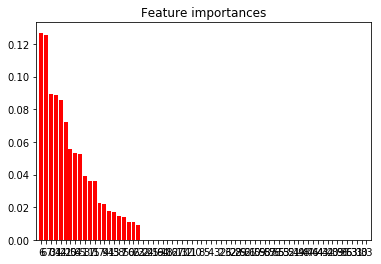

In [19]:
# Show the feature importance
import matplotlib.pyplot as plt

for f in range(X_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

plt.figure()
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X_train.shape[1]), indices)
plt.xlim([-1, X_train.shape[1]])
plt.show()

In [20]:
# Decision Tree
from sklearn import tree
dtree = tree.DecisionTreeClassifier(min_samples_split=3, random_state=1, max_depth=2)
dtree.fit(X_train, y_train)

predictions_dtree = dtree.predict(X_test)

print accuracy_score(predictions_dtree, y_test) 
print f1_score(predictions_dtree, y_test, average='macro')  

# Removing rows with blanks. Keeping columns with little impact = 0.537779048023
# Removing rows with blanks. Removing columns with little impact = 0.474821819663
# Removing rows with blanks. Keeping columns with little impact. Replacing NaN with 0 = 0.505594374456
# Normalising/scaling all features & replacing NaNs with zeros - 0.509810125976

print(classification_report(y_test, predictions_dtree, target_names=['0','1','2']))

0.956111047114
0.449130320578
             precision    recall  f1-score   support

          0       0.97      0.99      0.98      8282
          1       0.00      0.00      0.00       184
          2       0.42      0.33      0.37       215

avg / total       0.93      0.96      0.94      8681



In [21]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, predictions_dtree, pos_label=2)
print metrics.auc(fpr, tpr)

0.6571209599


In [22]:
# Logistic Regression - newton solver
from sklearn import linear_model

mul_lr = linear_model.LogisticRegression(multi_class='multinomial', solver='newton-cg', max_iter = 1000).fit(X_train, y_train)

print metrics.accuracy_score(y_test, mul_lr.predict(X_test))
print f1_score(mul_lr.predict(X_test), y_test, average='macro')  

# Removing rows with blanks. Keeping columns with little impact = 0.33297303908
# Removing rows with blanks. Removing columns with little impact = 0.389398740253
# Removing rows with blanks. Keeping columns with little impact. Replacing NaN with 0 = 0.329094313127
# Normalising/scaling all features & replacing NaNs with zeros - 0.33915451542

print(classification_report(y_test, mul_lr.predict(X_test), target_names=['0','1','2']))

0.952655224053
0.33915451542
             precision    recall  f1-score   support

          0       0.95      1.00      0.98      8282
          1       0.00      0.00      0.00       184
          2       0.19      0.02      0.04       215

avg / total       0.92      0.95      0.93      8681



In [23]:
# Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier(learning_rate=0.01,max_depth=8,n_estimators=50)

gbc.fit(X_train, y_train)

predictions_regr = gbc.predict(X_test)

print accuracy_score(predictions_regr, y_test) 
print f1_score(predictions_regr, y_test, average='macro')  

# Removing rows with blanks. Keeping columns with little impact = 0.51523512361
# Removing rows with blanks. Removing columns with little impact = 0.463561577444
# Removing rows with blanks. Keeping columns with little impact. Replacing NaN with 0 = 0.517008015402
# Normalising/scaling all features & replacing NaNs with zeros - 0.501200262891

print(classification_report(y_test, predictions_regr, target_names=['0','1','2']))

0.96256191683
0.509105339512
             precision    recall  f1-score   support

          0       0.97      1.00      0.98      8282
          1       0.59      0.07      0.13       184
          2       0.73      0.29      0.42       215

avg / total       0.95      0.96      0.95      8681



In [24]:
# Train the KNN classifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
predictions_knn = knn.predict(X_test)

print accuracy_score(predictions_knn, y_test) 
print f1_score(predictions_knn, y_test, average='macro')  

# Removing rows with blanks. Keeping columns with little impact = 0.328851933655
# Removing rows with blanks. Removing columns with little impact = 0.32454753119
# Removing rows with blanks. Keeping columns with little impact. Replacing NaN with 0 = 0.328977557403

# Normalising/scaling all features & replacing NaNs with zeros - 0.438035521333

print(classification_report(y_test, predictions_knn, target_names=['0','1','2']))

0.955419882502
0.435969431033
             precision    recall  f1-score   support

          0       0.96      1.00      0.98      8282
          1       0.29      0.05      0.09       184
          2       0.48      0.16      0.24       215

avg / total       0.94      0.96      0.94      8681



1. feature 6 (0.126913)
2. feature 67 (0.125545)
3. feature 0 (0.089326)
4. feature 34 (0.088952)
5. feature 14 (0.085764)
6. feature 21 (0.071925)
7. feature 20 (0.055355)
8. feature 54 (0.053360)
9. feature 65 (0.052645)
10. feature 1 (0.039393)
11. feature 37 (0.036134)
12. feature 15 (0.035744)
13. feature 17 (0.022815)
14. feature 9 (0.022079)
15. feature 41 (0.017770)
16. feature 45 (0.016830)
17. feature 38 (0.014376)
18. feature 7 (0.014236)
19. feature 50 (0.011202)
20. feature 66 (0.010676)
21. feature 23 (0.008960)
22. feature 22 (0.000000)
23. feature 24 (0.000000)
24. feature 25 (0.000000)
25. feature 19 (0.000000)
26. feature 64 (0.000000)
27. feature 18 (0.000000)
28. feature 16 (0.000000)
29. feature 27 (0.000000)
30. feature 13 (0.000000)
31. feature 12 (0.000000)
32. feature 11 (0.000000)
33. feature 10 (0.000000)
34. feature 8 (0.000000)
35. feature 5 (0.000000)
36. feature 4 (0.000000)
37. feature 3 (0.000000)
38. feature 2 (0.000000)
39. feature 26 (0.000000)
40. f

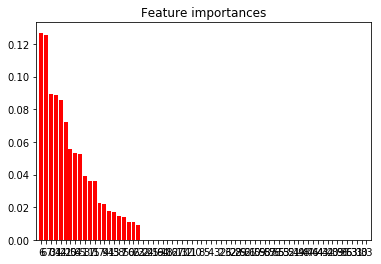

In [25]:
for f in range(X_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

plt.figure()
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X_train.shape[1]), indices)
plt.xlim([-1, X_train.shape[1]])
plt.show()

In [26]:
# Train the neural network classifier
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(solver='lbfgs', alpha=1e-5,
                    hidden_layer_sizes=(6, 2), random_state=1)

mlp.fit(X_train, y_train)  
predictions_mlp = mlp.predict(X_test)

print accuracy_score(predictions_mlp, y_test) 
print f1_score(predictions_mlp, y_test, average='macro')  

# Normalising/scaling all features & replacing NaNs with zeros - 0.325492739099

print(classification_report(y_test, predictions_mlp, target_names=['0','1','2']))

0.954037553277
0.325492739099
             precision    recall  f1-score   support

          0       0.95      1.00      0.98      8282
          1       0.00      0.00      0.00       184
          2       0.00      0.00      0.00       215

avg / total       0.91      0.95      0.93      8681



In [28]:
# Summarise the F1 score of all algorithms

# random forest
print 'Random forest F1 Score: ' 
print f1_score(predictions, y_test, average='macro')   
print ''

# decision tree
print 'Decision Tree F1 Score: ' 
print f1_score(predictions_dtree, y_test, average='macro')  
print ''

# Logistic regression
print 'Logistic Regression F1 Score: ' 
print f1_score(mul_lr.predict(X_test), y_test, average='macro')  
print ''

# Gradient booser
print 'Gradient Booster F1 Score: ' 
print f1_score(predictions_regr, y_test, average='macro')  
print ''

# Neural network
print 'Neural Net F1 Score: ' 
print f1_score(predictions_mlp, y_test, average='macro')  

# KNN
print 'KNN F1 Score: ' 
print f1_score(predictions_knn, y_test, average='macro')  


Random forest F1 Score: 
0.325492739099

Decision Tree F1 Score: 
0.449130320578

Logistic Regression F1 Score: 
0.33915451542

Gradient Booster F1 Score: 
0.509105339512

Neural Net F1 Score: 
0.325492739099
KNN F1 Score: 
0.435969431033


-- Keep columns with little impact
Random forest F1 Score: 
0.325492739099

Decision Tree F1 Score: 
0.449130320578

Logistic Regression F1 Score: 
0.33915451542

Gradient Booster F1 Score: 
0.50933068633

Neural Net F1 Score: 
0.325492739099

    -- Keep columns with little impact
    -- remove columns with high number of NaNs
    Random forest F1 Score: 
    0.325492739099

    Decision Tree F1 Score: 
    0.449130320578

    Logistic Regression F1 Score: 
    0.33915451542

    Gradient Booster F1 Score: 
    0.499382248154

    Neural Net F1 Score: 
    0.325492739099

    -- Keep columns with little impact
    -- Remove rows with NaNs
    Random forest F1 Score: 
    0.330967169476

    Decision Tree F1 Score: 
    0.330967169476

    Logistic Regression F1 Score: 
    0.330967169476

    Gradient Booster F1 Score: 
    0.356607495069

    Neural Net F1 Score: 
    0.330967169476



-- Remove columns with little impact
Random forest F1 Score: 
0.325492739099

Decision Tree F1 Score: 
0.449130320578

Logistic Regression F1 Score: 
0.33915451542

Gradient Booster F1 Score: 
0.499382248154

Neural Net F1 Score: 
0.325492739099